# Problem 1: Logistic Regression (105 points)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
from logisticClassify2 import *

## Question 1

1.Show the two classes in a scatter plot (one for each data set) and verify that one data set is linearly separable while the other is not. (5 points)


In [2]:
iris = np.genfromtxt("data/iris.txt", delimiter=None)
X, Y = iris[:, 0:2], iris[:, -1]  # get first two features & target
X, Y = ml.shuffleData(X, Y)  # reorder randomly (important later)
X, _ = ml.rescale(X)  # works much better on rescaled data

XA, YA = X[Y < 2, :], Y[Y < 2]  # get class 0 vs 1
XB, YB = X[Y > 0, :], Y[Y > 0]  # get class 1 vs 2

print(XA.shape, YA.shape)
print(XB.shape, YB.shape)

(99, 2) (99,)
(99, 2) (99,)


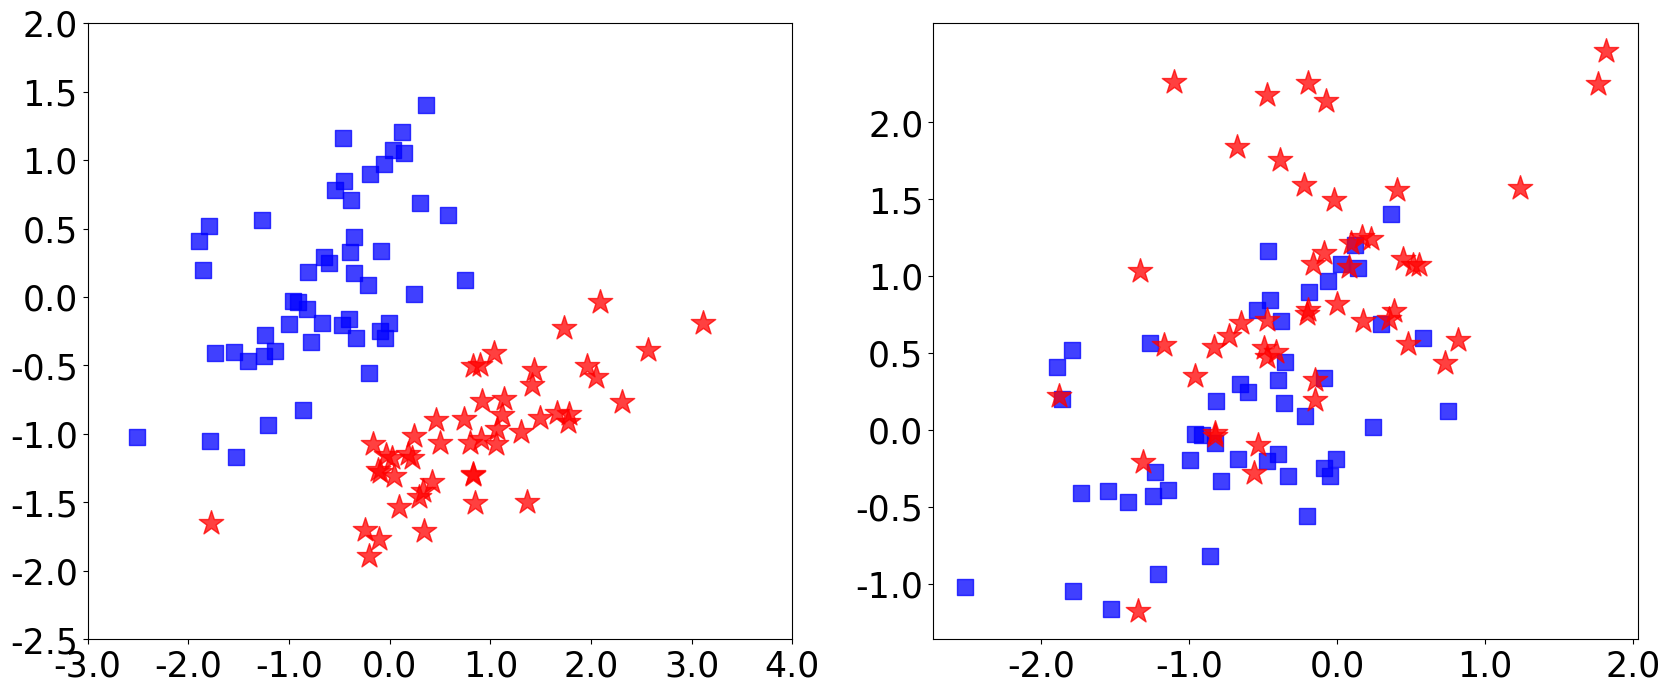

In [3]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))

maskA = YA == 1

ax[0].scatter(XA[maskA, 0], XA[maskA, 1], s=120, color="blue", marker="s", alpha=0.75)
ax[0].scatter(XA[~maskA, 0], XA[~maskA, 1], s=340, color="red", marker="*", alpha=0.75)

ax[0].set_xticks(ax[0].get_xticks())
ax[0].set_yticks(ax[0].get_yticks())
ax[0].set_xticklabels(ax[0].get_xticks(), fontsize=25)
ax[0].set_yticklabels(ax[0].get_yticks(), fontsize=25)

maskB = YB == 1

ax[1].set_xticks(ax[0].get_xticks())
ax[1].set_yticks(ax[0].get_yticks())
ax[1].scatter(XB[maskB, 0], XB[maskB, 1], s=120, color="blue", marker="s", alpha=0.75)
ax[1].scatter(XB[~maskB, 0], XB[~maskB, 1], s=340, color="red", marker="*", alpha=0.75)

ax[1].set_xticklabels(ax[1].get_xticks(), fontsize=25)
ax[1].set_yticklabels(ax[1].get_yticks(), fontsize=25)

plt.show()

According to the above diagram:

A is linearly separable because there is a line that could separable all the data.

B is not linearly separable.


## Question 2

2.Write (fill in) the function plotBoundary in logisticClassify2.py to compute the points on the decision boundary. In particular, you only need to make sure x2b is set correctly using self.theta . This will plot the data & boundary quickly, which is useful for visualizing the model during training. To demo your function plot the decision boundary corresponding to the classifier sign(.5 − .25x1 + 1x2) along with the A data, and again with the B data; these fixed parameters will look like an OK classifier on one data set, but a poor classifier on the other.

You can create a “blank” learner and set the weights by:

```python
import mltools as ml
from logisticClassify2 import *

learner = logisticClassify2(); # create "blank" learner
learner.classes = np.unique(YA) # define class labels using YA or YB
wts = np.array([theta0,theta1,theta2]); # TODO: fill in values
learner.theta = wts; # set the learner’s parameters
```

Include the lines of code you added to the function, and the two generated plots. (10 points)


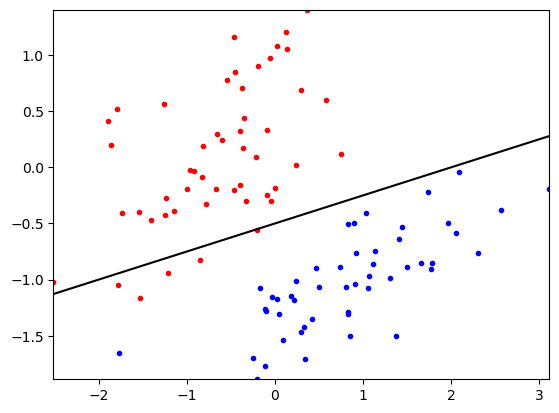

In [4]:
# A dataset
learner = logisticClassify2()
# create "blank" learner
learner.classes = np.unique(YA)  # define class labels using YA or YB
wts = np.array([0.5, -0.25, 1])
# TODO: fill in values
learner.theta = wts
# set the learner’s parameters

learner.plotBoundary(XA, YA)

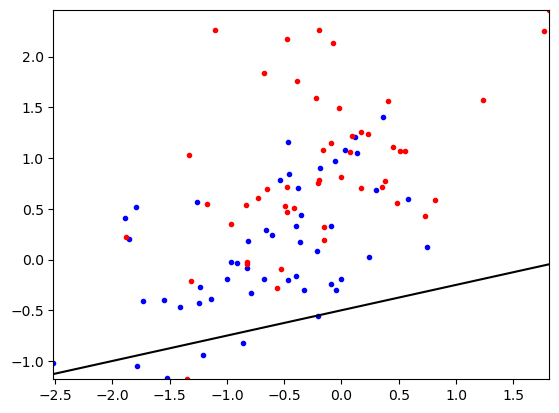

In [5]:
# B dataset
learnerB = logisticClassify2()
# create "blank" learner
learnerB.classes = np.unique(YB)  # define class labels using YA or YB
wts = np.array([0.5, -0.25, 1])
# TODO: fill in values
learnerB.theta = wts
# set the learner’s parameters

learnerB.plotBoundary(XB, YB)

## Question 3

3.Complete the logisticClassify2.predict function to make predictions for your classifier. Verify that your function works by computing & reporting the error rate of the classifier in the previous part on both data sets A and B. (The error rate on one should be ≈ 0.0505, and higher on the other.) Note that, in the code, the two classes are stored in the variable self.classes , with the first entry being the “negative” class (or class 0), and the second entry being the “positive” class, so you want to have different learner objects for each dataset, and you use learner.err directly.

Include the function definition and the two computed errors. (10 points)


In [6]:
# A dataset
learner = logisticClassify2()
learner.classes = np.unique(YA)
learner.theta = np.array([0.5, -0.25, 1])
learner.err(XA, YA)

0.050505050505050504

In [7]:
# B dataset
learnerB = logisticClassify2()
learnerB.classes = np.unique(YB)
learnerB.theta = np.array([0.5, -0.25, 1])
learnerB.err(XB, YB)

0.46464646464646464

## Question 4

4. Verify that your predict code matches your boundary plot by using plotClassify2D with your manually
   constructed learner on the two data sets. This will call predict on a dense grid of points, and you should
   find that the resulting decision boundary matches the one you computed analytically. (5 points)


/Users/harryxiong24/Code/Study/grad-code-collection/Winter 2024/ML/hw/hw3/mltools/plot.py:61: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  axis.plot( X[Y==c,0],X[Y==c,1], 'ko', color=cmap(cvals[i]), **kwargs )


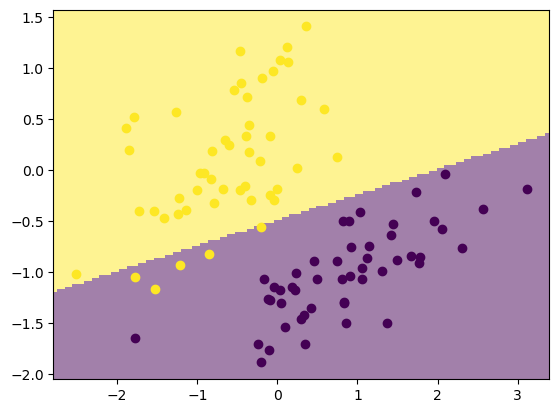

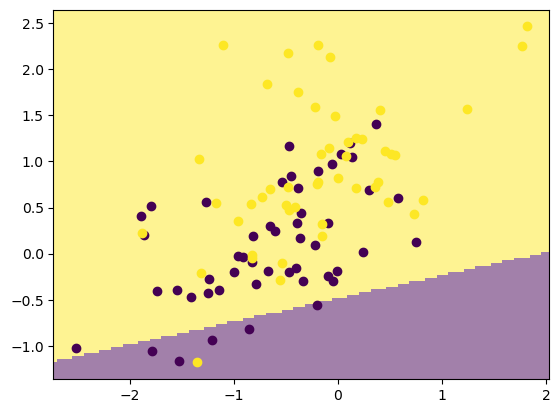

In [8]:
ml.plotClassify2D(learner, XA, YA)
plt.show()

ml.plotClassify2D(learnerB, XB, YB)
plt.show()

## Question 5

![Q5](./Q5.png)


## Question 6

In the logisticClassify2.py.


## Question 7

7.Run train for your logistic regression classifier on both data sets (A and B). Describe your parameter choices
for each dataset (stepsize, etc.) and include plots showing the convergence of the surrogate loss and error rate
(e.g., the loss values as a function of epoch during gradient descent), and the final converged classifier with the data (the included train function does that for you already). (10 points)


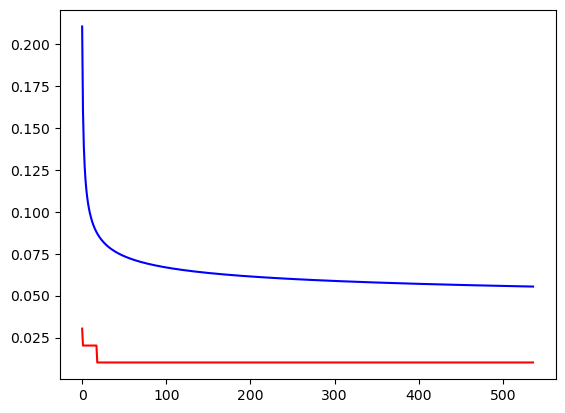

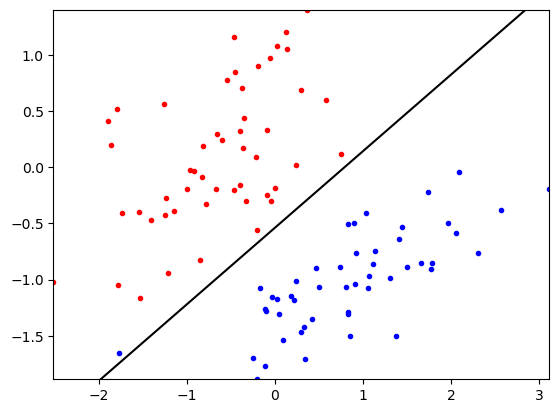

Training error rate:  0.010101010101010102


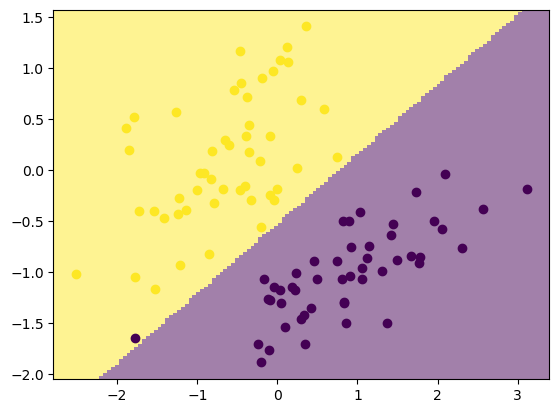

In [9]:
learnerA = logisticClassify2()
learnerA.theta = np.array([0.0, 0.0, 0.0])
learnerA.train(XA, YA, initStep=1e-1, stopEpochs=1000, stopTol=1e-5)
plt.show()
ml.plotClassify2D(learnerA, XA, YA)
print("Training error rate: ", learnerA.err(XA, YA))
plt.show()

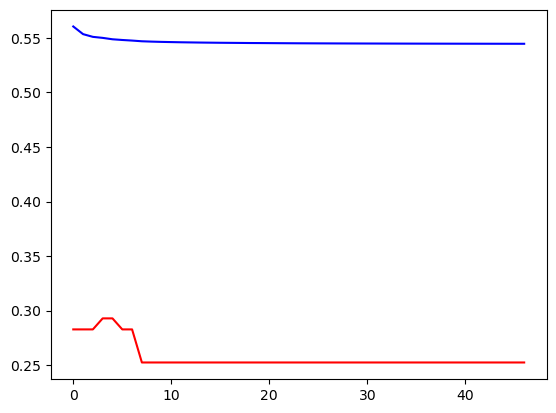

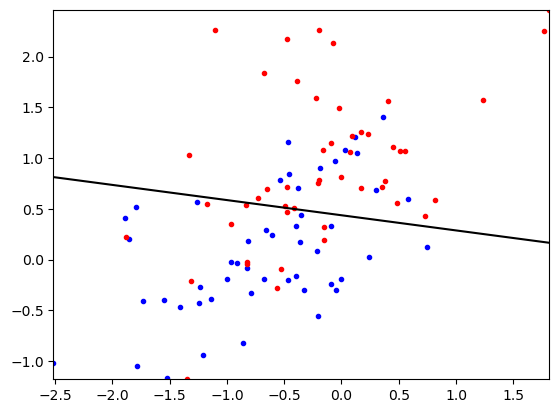

Training error rate:  0.25252525252525254


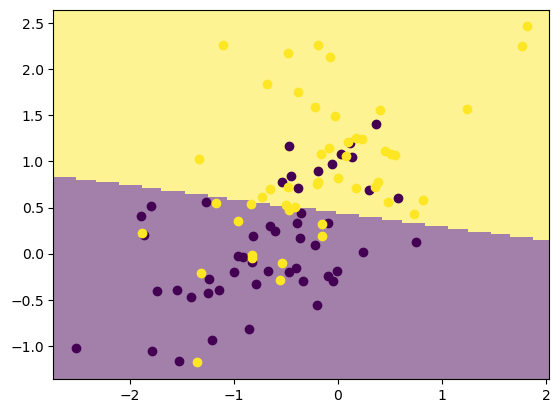

In [10]:
learnerB = logisticClassify2()
learnerB.theta = np.array([0.0, 0.0, 0.0])
learnerB.train(XB, YB, initStep=1e-1, stopEpochs=1000, stopTol=1e-5)
plt.show()
ml.plotClassify2D(learnerB, XB, YB)
print("Training error rate: ", learnerB.err(XB, YB))
plt.show()

## Question 8


In [11]:
def L1(self, X, Y, initStep=1.0, stopTol=1e-4, stopEpochs=5000, plot=None, alpha=2):
    """Train the logistic regression using stochastic gradient descent"""
    M, N = X.shape
    # initialize the model if necessary:
    self.classes = np.unique(Y)
    # Y may have two classes, any values
    XX = np.hstack((np.ones((M, 1)), X))  # XX is X, but with an extra column of ones
    YY = ml.toIndex(Y, self.classes)
    # YY is Y, but with canonical values 0 or 1
    if len(self.theta) != N + 1:
        self.theta = np.random.rand(N + 1)
    # init loop variables:
    epoch = 0
    done = False
    Jnll = []
    J01 = []
    while not done:
        stepsize, epoch = initStep * 2.0 / (2.0 + epoch), epoch + 1
        # update stepsize
        # Do an SGD pass through the entire data set:
        for i in np.random.permutation(M):
            ri = XX[i].dot(self.theta)
            # TODO: compute linear response r(x)
            sigmoid = 1.0 / (1.0 + np.exp(-ri))
            gradi = (
                -(1 - sigmoid) * XX[i, :]
                if YY[i]
                else sigmoid * XX[i, :] + alpha * np.sign(self.theta + 1e-200)
            )
            # TODO: compute gradient of NLL loss
            self.theta -= stepsize * gradi
            # take a gradient step

        J01.append(self.err(X, Y))  # evaluate the current error rate

        ## TODO: compute surrogate loss (logistic negative log-likelihood)
        ##  Jsur = sum_i [ (log si) if yi==1 else (log(1-si)) ]
        S = 1.0 / (1.0 + np.exp(-(XX.dot(self.theta))))
        Jsur = -np.mean(YY * np.log(S) + (1 - YY) * np.log(1 - S)) + alpha * np.sum(
            np.abs(self.theta)
        )
        Jnll.append(Jsur)  # TODO evaluate the current NLL loss
        plt.pause(0.01)
        # let OS draw the plot

        ## For debugging: you may want to print current parameters & losses
        # print self.theta, ' => ', Jnll[-1], ' / ', J01[-1]
        # raw_input()   # pause for keystroke

        # TODO check stopping criteria: exit if exceeded # of epochs ( > stopEpochs)
        done = epoch >= stopEpochs or (epoch > 1 and abs(Jnll[-1] - Jnll[-2]) < stopTol)
        # or if Jnll not changing between epochs ( < stopTol )
    plt.figure(1)
    plt.plot(Jnll, "b-", J01, "r-")
    plt.draw()
    # plot losses
    if N == 2:
        plt.figure(2)
        self.plotBoundary(X, Y)
        plt.draw()
        # & predictor if 2D

Training error rate:  0.2828282828282828


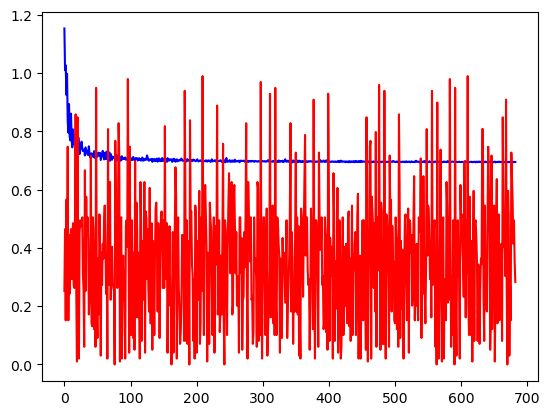

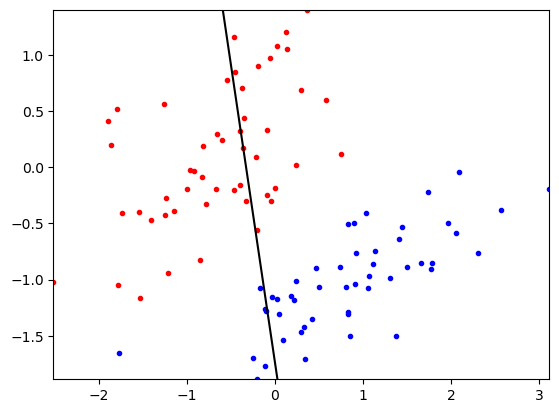

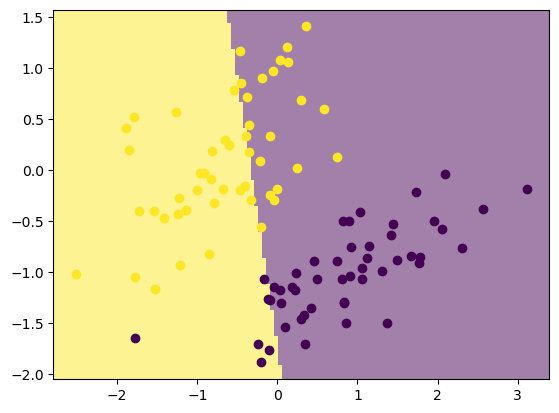

In [37]:
class myLogistic1(logisticClassify2):  # override methods here for solution doc
    regularize_train = L1


learnerA = myLogistic1()
learnerA.theta = np.array([0.0, 0.0, 0.0])
learnerA.regularize_train(XA, YA, initStep=1e-1, stopEpochs=1000, stopTol=1e-5, alpha=2)
plt.figure()
ml.plotClassify2D(learnerA, XA, YA)
print("Training error rate: ", learnerA.err(XA, YA))

High α may lead to underfitting, as the model becomes too simple and cannot capture the underlying pattern in the data.


Training error rate:  0.45454545454545453


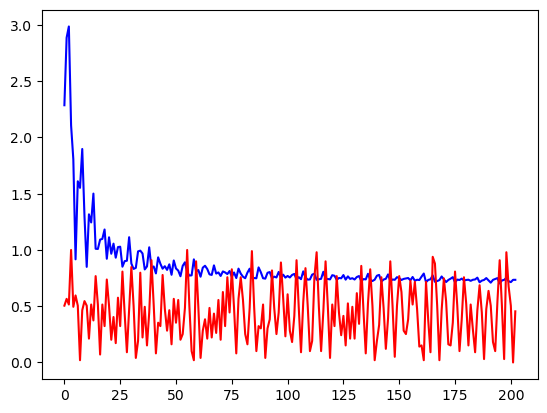

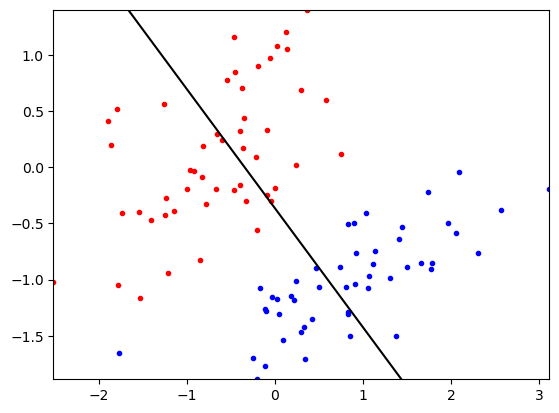

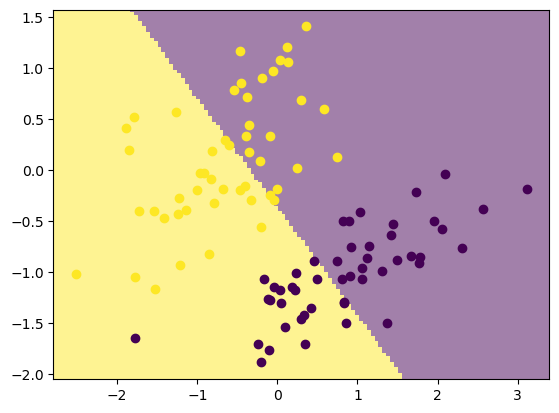

In [38]:
learnerA.regularize_train(XA, YA, initStep=1e-1, stopEpochs=1000, stopTol=1e-5, alpha=5)
plt.figure()
ml.plotClassify2D(learnerA, XA, YA)
print("Training error rate: ", learnerA.err(XA, YA))

## Question 9


In [13]:
def L2(self, X, Y, initStep=1.0, stopTol=1e-4, stopEpochs=5000, plot=None, alpha=2):
    """Train the logistic regression using stochastic gradient descent"""
    M, N = X.shape
    # initialize the model if necessary:
    self.classes = np.unique(Y)
    # Y may have two classes, any values
    XX = np.hstack((np.ones((M, 1)), X))  # XX is X, but with an extra column of ones
    YY = ml.toIndex(Y, self.classes)
    # YY is Y, but with canonical values 0 or 1
    if len(self.theta) != N + 1:
        self.theta = np.random.rand(N + 1)
    # init loop variables:
    epoch = 0
    done = False
    Jnll = []
    J01 = []
    while not done:
        stepsize, epoch = initStep * 2.0 / (2.0 + epoch), epoch + 1
        # update stepsize
        # Do an SGD pass through the entire data set:
        for i in np.random.permutation(M):
            ri = XX[i].dot(self.theta)
            # TODO: compute linear response r(x)
            sigmoid = 1.0 / (1.0 + np.exp(-ri))
            gradi = (
                -(1 - sigmoid) * XX[i, :]
                if YY[i]
                else sigmoid * XX[i, :] + 2 * alpha * self.theta
            )
            # TODO: compute gradient of NLL loss
            self.theta -= stepsize * gradi
            # take a gradient step

        J01.append(self.err(X, Y))  # evaluate the current error rate

        ## TODO: compute surrogate loss (logistic negative log-likelihood)
        ##  Jsur = sum_i [ (log si) if yi==1 else (log(1-si)) ]
        S = 1.0 / (1.0 + np.exp(-(XX.dot(self.theta))))
        Jsur = -np.mean(YY * np.log(S) + (1 - YY) * np.log(1 - S)) + alpha * np.sum(
            np.square(self.theta)
        )
        Jnll.append(Jsur)  # TODO evaluate the current NLL loss
        plt.pause(0.01)
        # let OS draw the plot

        ## For debugging: you may want to print current parameters & losses
        # print self.theta, ' => ', Jnll[-1], ' / ', J01[-1]
        # raw_input()   # pause for keystroke

        # TODO check stopping criteria: exit if exceeded # of epochs ( > stopEpochs)
        done = epoch >= stopEpochs or (epoch > 1 and abs(Jnll[-1] - Jnll[-2]) < stopTol)
        # or if Jnll not changing between epochs ( < stopTol )
    plt.figure(1)
    plt.plot(Jnll, "b-", J01, "r-")
    plt.draw()
    # plot losses
    if N == 2:
        plt.figure(2)
        self.plotBoundary(X, Y)
        plt.draw()
        # & predictor if 2D

Training error rate:  0.08080808080808081


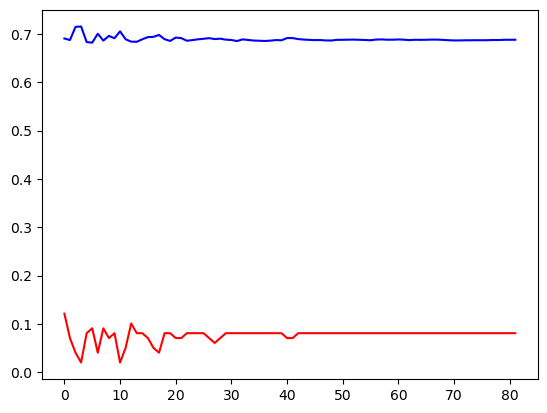

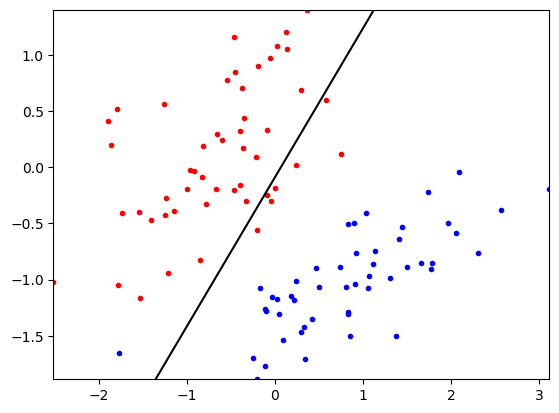

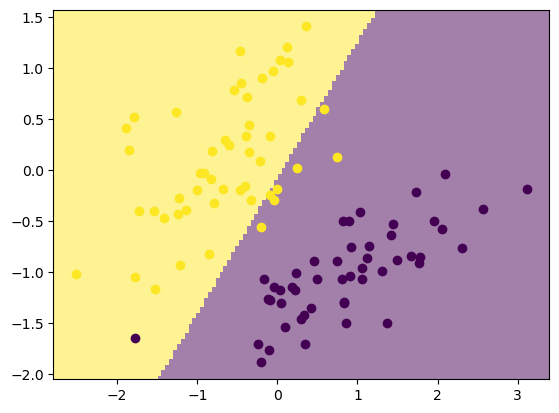

In [30]:
class myLogistic2(logisticClassify2):  # override methods here for solution doc
    regularize_train = L2


learnerA = myLogistic2()
learnerA.theta = np.array([0.0, 0.0, 0.0])
learnerA.regularize_train(
    XA, YA, initStep=1e-1, stopEpochs=1000, stopTol=1e-5, alpha=2.0
)
plt.figure()
ml.plotClassify2D(learnerA, XA, YA)
print("Training error rate: ", learnerA.err(XA, YA))

High α may lead to underfitting, as the model becomes too simple and cannot capture the underlying pattern in the data.


Training error rate:  0.21212121212121213


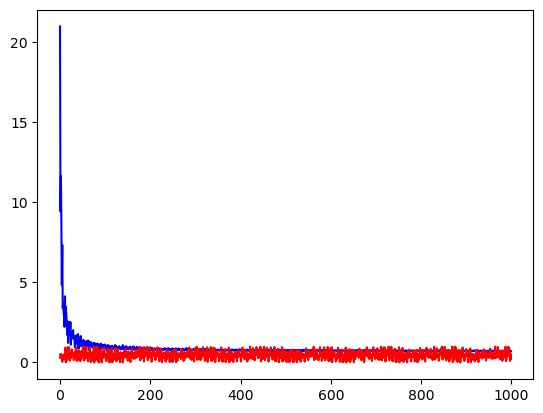

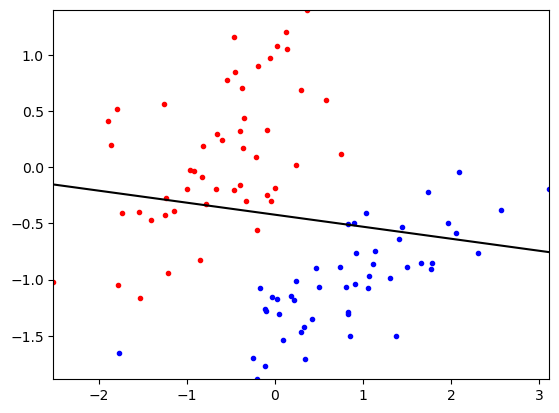

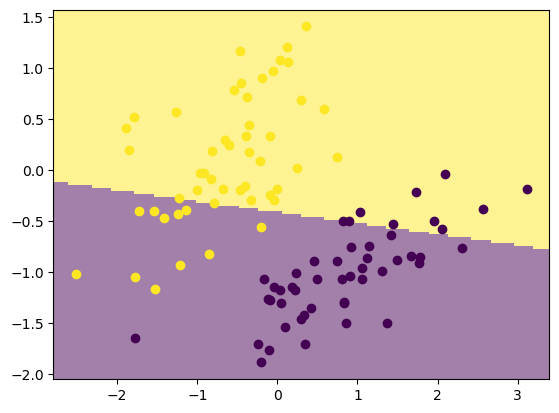

In [39]:
learnerA.regularize_train(
    XA, YA, initStep=1e-1, stopEpochs=1000, stopTol=1e-5, alpha=10
)
plt.figure()
ml.plotClassify2D(learnerA, XA, YA)
print("Training error rate: ", learnerA.err(XA, YA))

## Question 10

1. L1 regularization tends to produce sparse weight vectors, meaning many weights will be zero. And, in cases where the number of features exceeds the number of training samples, L1 regularization may produce multiple possible solutions. L2 regularization tends to decrease the size of weights uniformly, rather than setting them to zero. L2 regularization always produces a unique solution, even when the number of features exceeds the number of samples.

2. L2 is a better way.


# Statement of Collaboration

I do it by myself.
